In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fs_df = pd.read_csv('../data/fullsample.csv')
ce5_df = pd.read_csv('../data/ce5_9024_sbatch.csv')
ce6_df = pd.read_csv('../data/ce6_9024_sbatch.csv')

In [5]:
fs_df['BEGIN'] = pd.to_datetime(fs_df['BEGIN'], format='%Y-%m-%dT%H:%M:%S', errors='coerce')
fs_df['END'] = pd.to_datetime(fs_df['END'], format='%Y-%m-%dT%H:%M:%S', errors='coerce')
ce5_df['0'] = pd.to_datetime(ce5_df['0'], format='%Y-%m-%dT%H:%M:%S')
ce6_df['0'] = pd.to_datetime(ce6_df['0'], format='%Y-%m-%dT%H:%M:%S')

In [17]:
fs_923_df = fs_df[(fs_df['BEGIN'].dt.month == 9) & (fs_df['BEGIN'].dt.day == 23)]
ce5_923_df = ce5_df[(ce5_df['0'].dt.month == 9) & (ce5_df['0'].dt.day == 23)]
ce6_923_df = ce6_df[(ce6_df['0'].dt.month == 9) & (ce6_df['0'].dt.day == 23)]

In [18]:
ce5_923_df['4'] = ce5_923_df['4'].str.extract(r'(\d)')
ce5_923_df = ce5_923_df.rename(columns={'4':'returncode'})
ce6_923_df['4'] = ce6_923_df['4'].str.extract(r'(\d)')
ce6_923_df = ce6_923_df.rename(columns={'4':'returncode'})

C:\Users\georg\anaconda3\lib\site-packages\pandas\core\frame.py:3599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item_frame_value(key, value)


In [19]:
begin_load_df = fs_923_df[fs_923_df['PARTITION'] == 'production']\
                    [['BEGIN', 'USEDMEM', 'CPUS']].rename(columns={'BEGIN':'TIME'})
begin_load_df['ACTION'] = 'begin'

end_load_df = fs_923_df[fs_923_df['PARTITION'] == 'production']\
                    [['END', 'USEDMEM', 'CPUS']].rename(columns={'END':'TIME'})
end_load_df['ACTION'] = 'end'

In [21]:
load_df = begin_load_df.append(end_load_df)
load_df = load_df[(load_df['TIME'].dt.month == 9) & (load_df['TIME'].dt.day == 23)].sort_values('TIME')
load_df['USEDMEM'] = pd.to_numeric(load_df['USEDMEM'].str[:-1], errors='coerce')
load_df['CPUS'] = pd.to_numeric(load_df['CPUS'], errors='coerce')
load_df = load_df.fillna(0)

In [22]:
rows_lst = []
usedmem = 0
cpus = 0
for index, data in load_df.iterrows():
    usedmem = usedmem + data.USEDMEM if data.ACTION == 'begin' else usedmem - data.USEDMEM
    cpus = cpus + data.CPUS if data.ACTION == 'begin' else cpus - data.CPUS
    rows_lst.append([data.TIME, usedmem, cpus])
accumulated_usage_df = pd.DataFrame(rows_lst)
accumulated_usage_df['0'] = pd.to_datetime(accumulated_usage_df[0], format='%Y-%m-%dT%H:%M:%S')

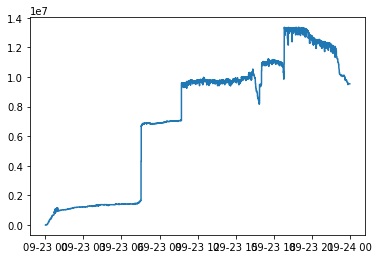

In [23]:
plt.plot(accumulated_usage_df[0], accumulated_usage_df[1])

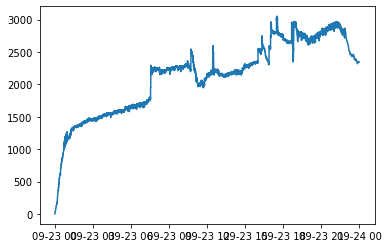

In [24]:
plt.plot(accumulated_usage_df[0], accumulated_usage_df[2])

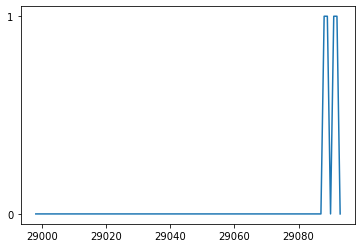

In [25]:
plt.plot(ce5_923_df['returncode'])

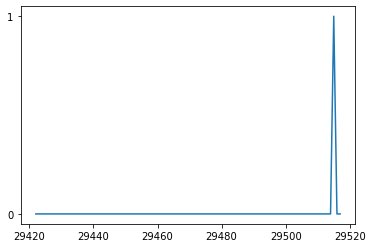

In [26]:
plt.plot(ce6_923_df['returncode'])